In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.preprocessing import StandardScaler  # It is important to scale the date


#Unsupervised Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.decomposition import PCA

#Logistic Regression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#Neural Network
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
import tensorflow as tf
from keras import optimizers
from keras import losses
import keras

#SVM
from sklearn import svm
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score

In [49]:
data = pd.read_csv('ASL_data_Numeric_labels_with_empty_backg_30x30_1000samp_number_only.csv')
data = data.dropna()
print(data.shape)
#Convert dataframe data into a numpy array
df = np.array(data.values)
#Select first column for the labels/y
y = df[:,0]
#Select remaining columns as x data(pixel array)
x = df[:,1:]
print(y.shape, x.shape)

(11000, 901)
(11000,) (11000, 900)


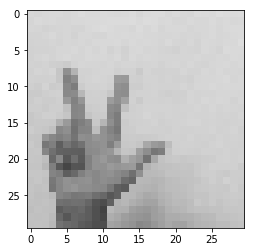

In [45]:
#Render the image
sample1 = np.uint8(x[0,:].reshape(30,30))

img = Image.fromarray(sample1)
plt.imshow(img)

# Unsupervised Analysis

In [52]:
#Find accuracy, rsq and MSE
def statistics(yhat,y):
    #mean squared error
    mse = np.mean((y-yhat)**2)
    count = 0
    for i in range(len(yhat)):
        if(yhat[i] == y[i]):
            count += 1
    accuracy = count/len(yhat)
    #Calculate coefficient of determination
    rss = np.sum((y-yhat)**2)
    tss = np.sum((y-np.mean(y))**2)
    rsq = 1-(rss/tss)
    #Calculate F1 score
    f1 = f1_score(y,yhat,average='macro')
    return mse,accuracy,rsq,f1

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(11000, 2)
Confusion matrix
 [[   9   41  473   12  124    0  146    3   21   24  147]
 [  29   10  436    0   50    0  302    7   32   77   57]
 [ 175   28   97    7  228    0  274   64   21   35   71]
 [ 171   12    0   86  477    4    0  187    8    6   49]
 [ 131   39    0  420   97   29    0  196    7   26   55]
 [ 475   37    0   56  130    0   27  100   89   72   14]
 [ 363   26   60   43  203    0  194   82    0   28    1]
 [ 231   41    0  100   45    0    0  331    4  248    0]
 [ 360    0    3   39  401    0   64    2    0  131    0]
 [ 211   52    0   78  123    0    0  336  145   55    0]
 [   0    0    0    0    0 1000    0    0    0    0    0]]
MSE 18.952363636363636
Accuracy 0.07990909090909092
R^2 -0.8952363636363636
F1 Score 0.07460358898179466


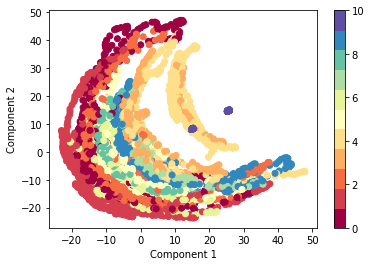

In [53]:
# Unsupervised Analysis-K Means Clustering
X_scale = StandardScaler()
x_unsup = X_scale.fit_transform(x)

#Visualize data in 2 dimensions: preserving maximum data variance
project = PCA(2).fit_transform(x_unsup)  # project from 900 to 2 dimensions
print(project.shape)

plt.scatter(project[:, 0], project[:, 1],
            c=y,cmap=plt.cm.get_cmap('Spectral', 11))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

#Without PCA transformation
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(x_unsup)
#predicted labels for each point
yhat = clusters.labels_
mse, accuracy,rsq,f1 = statistics(yhat,y) #found below, calculates MSE, R^2 and accuracy
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)
print("F1 Score", f1)

900
82


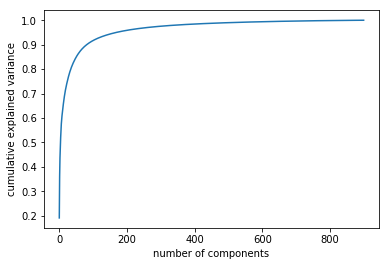

In [41]:
#Explained variance by number of components
pca = PCA().fit(x_unsup)
print(pca.n_components_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

pca = PCA(0.90).fit(x_unsup) 
print(pca.n_components_) #90% of variance explained by 82 components

Confusion matrix
 [[ 94  14 186   0  57  18   0 348  14 156 113]
 [ 24   0 231   0 102  22   0 284   0 274  63]
 [ 58  48 252   0  89  34   0 193  17 252  57]
 [ 27 229   0  26  64  46   3   0 522   0  83]
 [118 176   0 300 126  74   8   0 156   0  42]
 [  0 295 106   0 172  49   0 237  98  17  26]
 [  0 119 309   0  82  12   0 230  92 147   9]
 [  0 353   0   0 438  72   0   0 117   0  20]
 [  0 148 421   0 125   0   0 240  27   5  34]
 [  0 288   0   0 205 196   0   1 235   0  75]
 [  0   0   0 500   0   0 500   0   0   0   0]]
MSE 22.514272727272726
Accuracy 0.05218181818181818
R^2 -1.2514272727272728
F1 Score 0.0511347537495967
[[  3.38722738  36.42873486]
 [  0.40278735  -5.91686039]
 [-13.75038433   3.48807913]
 [ 13.9132902   10.54912438]
 [ 10.85174828 -12.14139181]
 [ 27.64714367 -10.32778259]
 [ 25.5110318   14.45656369]
 [-12.3974249   -5.14816452]
 [ -4.33317861   8.41871805]
 [ -8.16973004 -15.80332977]
 [ -8.55457974  20.28295804]]
Clustered Labels [ 8 10  0 ...  8  1  6]

Text(0.5, 1.0, 'K-means clustering on the dataset')

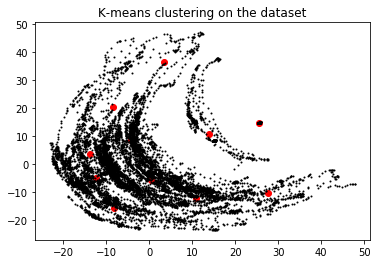

In [54]:
#K-Means clustering with PCA-transformed 2 components of images
#11 cluster for the digits 0-10 inclusive
clusters = KMeans(n_clusters = 11)
clusters.fit_predict(project)

yhat = clusters.labels_
mse, accuracy, rsq, f1 = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)
print("F1 Score", f1)

# Plot the cluster centers and PCA transformed data
plt.plot(project[:,0], project[:,1],'k.', markersize=2)
centers = clusters.cluster_centers_
print(centers)
print("Clustered Labels",clusters.labels_)
print("True Labels", y)
plt.scatter(centers[:, 0], centers[:, 1], color='red')
plt.title('K-means clustering on the dataset')

In [55]:
#K-Means clustering with PCA-transformed 82 components of images
project_82 = PCA(n_components=82).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_82)

yhat = c.labels_
mse, accuracy,rsq,f1 = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)
print("F1 Score", f1)

Confusion matrix
 [[   0   65   25   21   52  105   25   25  124  524   34]
 [   0   50    0   70  248   30    0   44   61  443   54]
 [   0  285   14   62  368   60    7   25   65   34   80]
 [   5  343    0  159   77   23   78   10  262    0   43]
 [  34   64   36   42  130   31  417   14   82    0  150]
 [   0  272    2  107  318    9   66   97   44    0   85]
 [   0  379   20   65  378    0   51    0   10   52   45]
 [   0   57   35  313  283    0  103    8    0    0  201]
 [   0  463    0  138  345    0   41    0   13    0    0]
 [   0  137   43  251  140    0   90  154   66    0  119]
 [1000    0    0    0    0    0    0    0    0    0    0]]
MSE 29.420454545454547
Accuracy 0.03945454545454546
R^2 -1.9420454545454544
F1 Score 0.03380227656826547


In [56]:
#K-Means clustering with PCA-transformed 200 components of images
project_200 = PCA(n_components=200).fit_transform(x_unsup)
c = KMeans(n_clusters=11)
c.fit_predict(project_200)

yhat = c.labels_
mse, accuracy,rsq,f1 = statistics(yhat,y)
print("Confusion matrix\n", confusion_matrix(y,yhat))
print("MSE", mse)
print("Accuracy", accuracy)
print("R^2", rsq)
print("F1 Score", f1)

Confusion matrix
 [[  40    0    0   93   41   22  128   22   69  537   48]
 [   0    0    0   50  253   70   44   38   56  459   30]
 [ 111    0    0   91  308   46   65   22  289    3   65]
 [  46    0   33  374  172   48   33    8  243    0   43]
 [  89   33  344   79  163   26   53   10   61    0  142]
 [  97    0    0   83  263   80   12   90  305    0   70]
 [ 180    0    0   71  332   48    0    0  330    0   39]
 [  96    0   16    8  383  293    0    6   51    0  147]
 [  46    0    0   26  187  131    0    0  610    0    0]
 [ 123    0   37   97  245  129    0  148  116    0  105]
 [   0 1000    0    0    0    0    0    0    0    0    0]]
MSE 25.557727272727274
Accuracy 0.11572727272727273
R^2 -1.555772727272727
F1 Score 0.09124559367374772


# Logistic Regression - Lasso Regularization

In [35]:
# One vs Rest

X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

X_train, X_test, Y_train, Y_test = train_test_split(x_cnn, y,test_size=0.4, shuffle = True)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga',multi_class='ovr')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))
    print("F1 Score", f1_score(Y_test, Yhat_test,average='macro'))

    
    c_logreg.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy on training data = 0.092879
Accuracy on test data = 0.087955
-0.9193981122357315
Accuracy on training data = 0.149545
Accuracy on test data = 0.152955
0.11826007463377708


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.844091
Accuracy on test data = 0.835227
0.8121488745087867


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.985758
Accuracy on test data = 0.962727
0.9563949661280732


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.998636
Accuracy on test data = 0.974773
0.9705568943630625


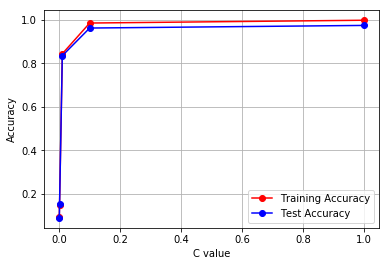

In [36]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [37]:
# x_scale = preprocessing.scale(X)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C=c,penalty='l1', solver='saga',multi_class='multinomial')

    logreg.fit(X_train, Y_train)

    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train,Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)

    Yhat_test = logreg.predict(X_test)

    acc_test = logreg.score(X_test,Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))
    print("F1 Score", f1_score(Y_test, Yhat_test,average='macro'))


    c_logreg.append(c)

Accuracy on training data = 0.093030
Accuracy on test data = 0.087727
-1.5883893286008406
Accuracy on training data = 0.170909
Accuracy on test data = 0.172045
-0.0859457937868755


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.854697
Accuracy on test data = 0.837045
0.810846890783957


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.993788
Accuracy on test data = 0.978182
0.9835082061521576


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.999848
Accuracy on test data = 0.994091
0.9951803760361568


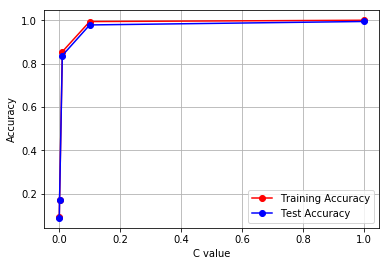

In [38]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'ro-')
plt.plot(c_logreg, acc_test_logreg,'bo-')
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistical Regression - Ridge Regression

In [18]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, solver='saga',multi_class='ovr')
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))
    print("F1 Score", f1_score(Y_test, Yhat_test,average='macro'))

    
    c_logreg2.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.789091
Accuracy on test data = 0.779318
0.7195145299811856


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.938030
Accuracy on test data = 0.925455
0.914991925080343


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.988939
Accuracy on test data = 0.970909
0.9583881355546674


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.997273
Accuracy on test data = 0.980455
0.9733491907208287


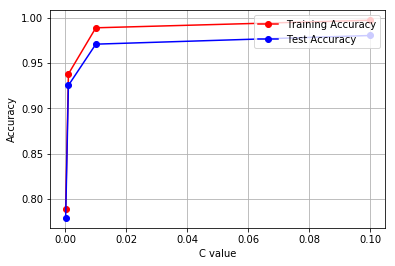

In [19]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

In [20]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    
    logreg2 = linear_model.LogisticRegression(C=c, solver='saga',multi_class='multinomial')
    
    logreg2.fit(X_train, Y_train)
    
    Yhat_train = logreg2.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    print(r2_score(Y_test, Yhat_test))
    print("F1 Score", f1_score(Y_test, Yhat_test,average='macro'))
    
    c_logreg2.append(c)

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.817273
Accuracy on test data = 0.810000
0.7466914925765981


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.965758
Accuracy on test data = 0.951364
0.9370446119001894


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy on training data = 0.996818
Accuracy on test data = 0.987955
0.9891337902080632
Accuracy on training data = 1.000000
Accuracy on test data = 0.996364
0.9961110407060437


c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


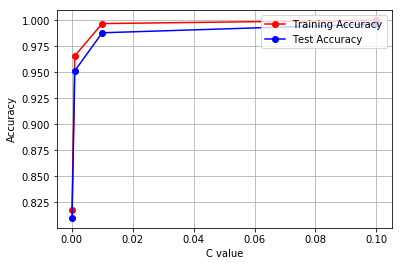

In [21]:
cVals = [0.0001, 0.001, 0.01, 0.1]
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

plt.plot(c_logreg2, acc_train_logreg2, 'ro-') 
plt.plot(c_logreg2, acc_test_logreg2,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistical Regression - Polynomial Feature Transformation

In [22]:
poly = PolynomialFeatures(degree=2)

# Create the transformed data matrices for training and test using poly.fit_transform(..)
X_transformed_train = poly.fit(X_train)
X_transformed_test = poly.fit(X_test)

In [23]:
# Not enough memory
X_transformed_train = poly.transform(X_train)
X_transformed_test = poly.transform(X_test)

MemoryError: 

# Support Vector Machine - Linear Kernal

In [33]:
acc_train_svm= []
acc_test_svm = []
c_svm = []

X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_cnn, y,test_size=0.4, shuffle = True)


def svm_linear(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.LinearSVC(C = c)
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    print(r2_score(Y_test, Yhat_svc_linear_test))
    print("F1 Score", f1_score(Y_test, Yhat_svc_linear_test,average='macro'))
    
    c_svm.append(c)   

c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\jeff\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train Accuracy = 0.645000
Test Accuracy = 0.639545
0.4733476170415746
Train Accuracy = 0.801212
Test Accuracy = 0.790000
0.7355954491063477
Train Accuracy = 0.921667
Test Accuracy = 0.895909
0.870550982632594
Train Accuracy = 0.977273
Test Accuracy = 0.957045
0.9377993112224322
Train Accuracy = 0.999848
Test Accuracy = 0.981364
0.9771938455754694


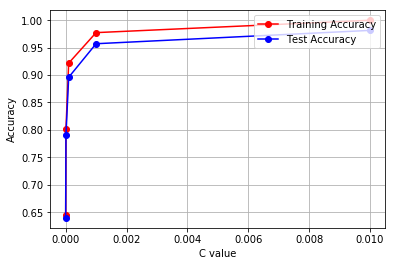

In [25]:
# cVals = [0.000001, 0.00001, 0.0001, 0.001]
cVals = [0.000001, 0.00001, 0.0001,0.001, 0.01]

for c in cVals:
    svm_linear(c)

plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Radial Basis Function Kernal

In [26]:
acc_train_svm = []
acc_test_svm = []
c_svm= []
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_RBF(c):
    # Create an object of svm.SVC(probability = False, kernel = 'linear', C = c).
    svc = svm.SVC(kernel = 'rbf', C = c, gamma = 'scale')
    
    # Fit the classifier on the training set.
    svc.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print(r2_score(Y_test, Yhat_svc_linear_test))
    print("F1 Score", f1_score(Y_test, Yhat_svc_linear_test,average='macro'))
    c_svm.append(c)

Accuracy = 0.182121
Accuracy = 0.170000
-0.7471716895653959
Accuracy = 0.538636
Accuracy = 0.534773
0.1683325094764745
Accuracy = 0.949545
Accuracy = 0.938182
0.9313979861877802
Accuracy = 0.999848
Accuracy = 0.999318
0.999403460749459
Accuracy = 1.000000
Accuracy = 0.999773
0.999632898922744


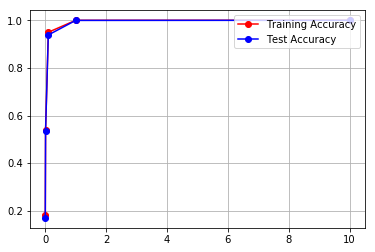

In [27]:
cVals = [0.001, 0.01, 0.1, 1, 10]

for c in cVals:
    svm_RBF(c)
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machine - Polynomial Kernal

In [28]:
acc_train_svm = []
acc_test_svm = []
c_svm= []
# X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.4, shuffle = True)

def svm_polynomial(c):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'poly' , value of C = c.
    svc_polynomial = svm.SVC(kernel = 'poly', C = c, gamma = 'scale')
    
    A = X_train[0:1100,:]  # First 300 rows of training set.
    B = Y_train[0:1100]  
    C = X_test[0:1100,:]   # First 100 rows of test set.
    D = Y_test[0:1100]
    
    # Fit the classifier on the training set.
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A, B)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(A)
    acc_train = np.mean(Yhat_svc_polynomial_train == B)
    acc_train_svm.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(C)
    acc_test = np.mean(Yhat_svc_polynomial_test == D)
    acc_test_svm.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))
    print("r2 = {0:f}".format(r2_score(D, Yhat_svc_polynomial_test)))
    print("F1 Score", f1_score(D, Yhat_svc_polynomial_test,average='macro'))   

    c_svm.append(c)

Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.100000
Accuracy = 0.077273
r2 = -1.615519
Accuracy = 0.149091
Accuracy = 0.110909
r2 = -1.561425
Accuracy = 0.467273
Accuracy = 0.390909
r2 = -0.010334
Accuracy = 0.890909
Accuracy = 0.803636
r2 = 0.788375
Accuracy = 0.993636
Accuracy = 0.942727
r2 = 0.947368


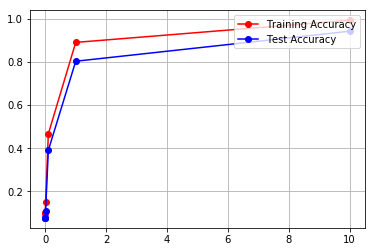

In [34]:
cVals = [0.00001,0.0001, 0.001, 0.01, 0.1,1,10]

for c in cVals:
    svm_polynomial(c)

    
plt.plot(c_svm, acc_train_svm, 'ro-') 
plt.plot(c_svm, acc_test_svm,'bo-') 
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Convolutional Neural Network

### Preprocessing of data

In [75]:
#Reinitialize data
#Scaling the features to help the algorithm converge, we will scale the data to have a mean of 0 and unit variance
#Run with original X data once
X_scale = StandardScaler()
x_cnn = X_scale.fit_transform(x)

#Split the data into training and test set.  60% training and 40% test, shuffle data
X_train, X_test, y_train, y_test = train_test_split(x_cnn, y, test_size=0.4,shuffle=True)
x_train = X_train.reshape(X_train.shape[0],30,30,1)
x_test = X_test.reshape(X_test.shape[0],30,30,1)


#Converts a class vector (integers) to binary class matrix.
y_train = keras.utils.to_categorical(y_train, 11)
y_test = keras.utils.to_categorical(y_test, 11)

print(x_train.shape)
print(y_train.shape)

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(6600, 30, 30, 1)
(6600, 11)


### Standard

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.6039 - acc: 0.8194 - val_loss: 0.0542 - val_acc: 0.9898
Epoch 2/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0189 - acc: 0.9967 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 8s 1ms/step - loss: 6.3781e-04 - acc: 1.0000 - val_loss: 6.6549e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 4.1195e-04 - acc: 1.0000 - val_loss: 4.8710e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 3.0475e-04 - acc: 1.0000 - val_loss: 3.9337e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 8s 1ms/step - loss: 2.3208e-04 - acc: 1.0000 - val_loss: 3.2758e-04

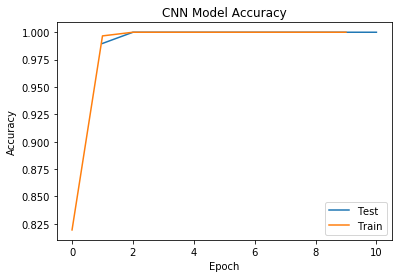

rsq = 0.999993
F1 Score 1.0


In [77]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
#Adam-method for stochastic optimization
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data, 10 epochs, batches of 100 for weight update, validation
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
#provide summary of types of layers and parameters in the model
model.summary()
#Calculate test loss and accuracy
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the training and test accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Learning Rate (increased from 0.001 to 0.01)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 14.4515 - acc: 0.0903 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 2/10
6600/6600 [==============================] - 8s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 3/10
6600/6600 [==============================] - 8s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 5/10
6600/6600 [==============================] - 8s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 14.6406 - acc: 0.0917 - val_loss: 14.6711 - val_acc: 0.0898

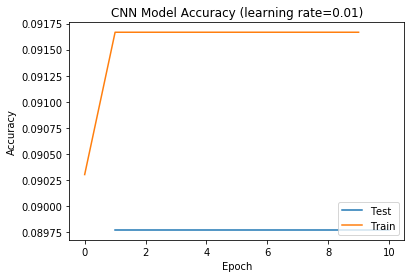

rsq = -1.002500
F1 Score 0.014977723006920086


c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [78]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.01
learning_rate = 0.01
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.01)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Learning Rate (decreased from 0.001 to 0.0001)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 11s 2ms/step - loss: 1.6938 - acc: 0.5477 - val_loss: 1.0150 - val_acc: 0.7441
Epoch 2/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.6467 - acc: 0.8594 - val_loss: 0.4034 - val_acc: 0.9300
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2679 - acc: 0.9545 - val_loss: 0.1878 - val_acc: 0.9709
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1385 - acc: 0.9817 - val_loss: 0.1022 - val_acc: 0.9873
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0758 - acc: 0.9915 - val_loss: 0.0588 - val_acc: 0.9964 loss: 0.0790 - 
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0458 - acc: 0.9965 - val_loss: 0.0427 - val_acc: 0.9961
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0295 - acc: 0.9986 - val_loss: 0.0251 - val_acc: 0.99

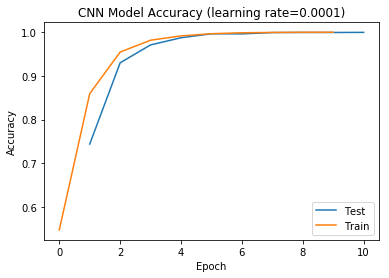

rsq = 0.998181
F1 Score 0.9995445710474865


In [79]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.0001
learning_rate = 0.0001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (learning rate=0.0001)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Layers (Removed a Convolution and Pooling Layer)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 13s 2ms/step - loss: 0.4862 - acc: 0.8676 - val_loss: 0.0588 - val_acc: 0.9852
Epoch 2/10
6600/6600 [==============================] - 10s 1ms/step - loss: 0.0140 - acc: 0.9986 - val_loss: 0.0087 - val_acc: 0.9986
Epoch 3/10
6600/6600 [==============================] - 11s 2ms/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0048 - val_acc: 0.9989
Epoch 4/10
6600/6600 [==============================] - 9s 1ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9989
Epoch 5/10
6600/6600 [==============================] - 10s 1ms/step - loss: 8.8123e-04 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 0.9989
Epoch 6/10
6600/6600 [==============================] - 11s 2ms/step - loss: 6.0972e-04 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 0.9989
Epoch 7/10
6600/6600 [==============================] - 9s 1ms/step - loss: 4.6163e-04 - acc: 1.0000 - val_loss: 0.0027 - val_acc: 0.99

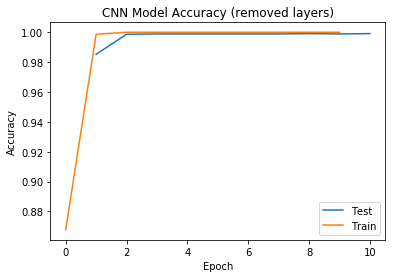

rsq = 0.998812
F1 Score 0.9990500163996129


In [80]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, removed a convolution and pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (removed layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Activation Function (sigmoid)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 8s 1ms/step - loss: 2.4561 - acc: 0.1023 - val_loss: 2.2804 - val_acc: 0.1902
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 1.6914 - acc: 0.4505 - val_loss: 1.0421 - val_acc: 0.6705
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.6799 - acc: 0.8029 - val_loss: 0.4174 - val_acc: 0.9014
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2938 - acc: 0.9391 - val_loss: 0.2092 - val_acc: 0.9630
Epoch 5/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.1546 - acc: 0.9732 - val_loss: 0.1204 - val_acc: 0.9848
Epoch 6/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0937 - acc: 0.9876 - val_loss: 0.0754 - val_acc: 0.99021 - ac
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0615 - acc: 0.9942 - val_loss: 0.0575 - val_acc: 0.9945
Epoch 8/

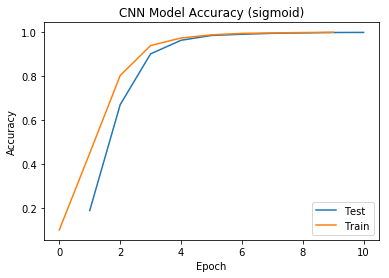

rsq = 0.994349
F1 Score 0.9985974693193661


In [81]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used sigmoid activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='sigmoid',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Activation Function (tanh)

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 0.5552 - acc: 0.8356 - val_loss: 0.0733 - val_acc: 0.9841
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0363 - acc: 0.9923 - val_loss: 0.0168 - val_acc: 0.9968
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0048 - acc: 0.9997 - val_loss: 0.0044 - val_acc: 0.9993
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 0.9998
Epoch 5/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 0.9998
Epoch 6/10
6600/6600 [==============================] - 8s 1ms/step - loss: 8.1868e-04 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 0.9998
Epoch 7/10
6600/6600 [==============================] - 8s 1ms/step - loss: 6.5619e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 0.9998
Epoch

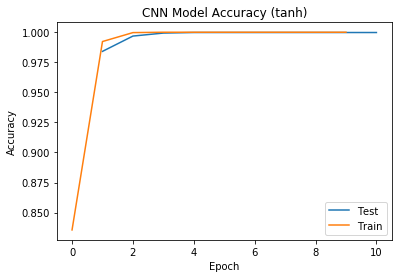

rsq = 0.999528
F1 Score 0.9997683709499402


In [82]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Used tanh activation function
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='tanh',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='tanh'))
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Batch Normalization Regularization

Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 28s 4ms/step - loss: 0.2404 - acc: 0.9336 - val_loss: 0.0042 - val_acc: 0.9998
Epoch 2/10
6600/6600 [==============================] - 21s 3ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/10
6600/6600 [==============================] - 21s 3ms/step - loss: 8.4709e-04 - acc: 1.0000 - val_loss: 6.7281e-04 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 21s 3ms/step - loss: 4.3015e-04 - acc: 1.0000 - val_loss: 4.5204e-04 - val_acc: 1.0000
Epoch 5/10
6600/6600 [==============================] - 21s 3ms/step - loss: 3.2092e-04 - acc: 1.0000 - val_loss: 3.4257e-04 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 21s 3ms/step - loss: 2.5659e-04 - acc: 1.0000 - val_loss: 3.0573e-04 - val_acc: 1.0000
Epoch 7/10
6600/6600 [==============================] - 23s 4ms/step - loss: 1.9691e-04 - acc: 1.0000 - val_lo

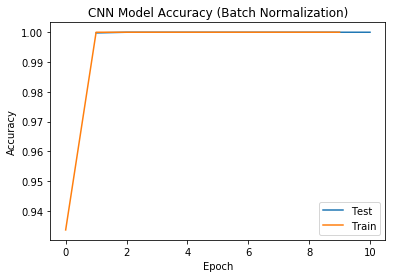

rsq = 0.999998
F1 Score 1.0


In [86]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add Batch normalization (normalizes inputs by )
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(11, activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Batch Normalization)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### LASSO (L1) Regression Regularization

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_regularizer=<keras.reg..., activation="softmax")`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 10s 2ms/step - loss: 2.9493 - acc: 0.7944 - val_loss: 1.1740 - val_acc: 0.9775
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.7213 - acc: 0.9867 - val_loss: 0.4604 - val_acc: 0.9939
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.3423 - acc: 0.9948 - val_loss: 0.2498 - val_acc: 0.9991
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.2001 - acc: 0.9998 - val_loss: 0.1636 - val_acc: 0.9995
Epoch 5/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1448 - acc: 0.9995 - val_loss: 0.1255 - val_acc: 0.9995
Epoch 6/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1071 - acc: 0.9998 - val_loss: 0.1006 - val_acc: 0.9993
Epoch 7/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0889 - acc: 1.0000 - val_loss: 0.0795 - val_acc: 0.9995
Epoch 8/10
66

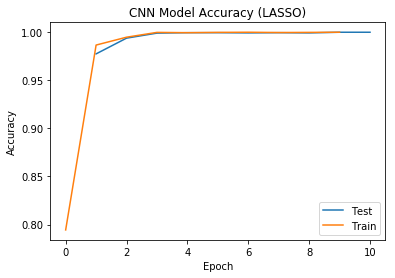

rsq = 0.999699
F1 Score 1.0


In [84]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L1 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l1(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (LASSO)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))

### Ridge (L2) Regression Regularization

c:\users\hannah daniel\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, kernel_regularizer=<keras.reg..., activation="softmax")`
  del sys.path[0]


Train on 6600 samples, validate on 4400 samples
Epoch 1/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.7868 - acc: 0.8138 - val_loss: 0.1918 - val_acc: 0.9918
Epoch 2/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.1428 - acc: 0.9965 - val_loss: 0.1141 - val_acc: 0.9998
Epoch 3/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0949 - acc: 1.0000 - val_loss: 0.0805 - val_acc: 1.0000
Epoch 4/10
6600/6600 [==============================] - 7s 1ms/step - loss: 0.0692 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 0.9998
Epoch 5/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0511 - acc: 1.0000 - val_loss: 0.0445 - val_acc: 1.0000
Epoch 6/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0392 - acc: 1.0000 - val_loss: 0.0359 - val_acc: 0.9998
Epoch 7/10
6600/6600 [==============================] - 8s 1ms/step - loss: 0.0300 - acc: 1.0000 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 8/10
660

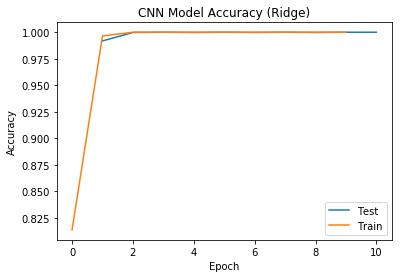

rsq = 0.999911
F1 Score 1.0


In [85]:
#Build network and test
keras.backend.clear_session()
model = Sequential()
#Use ReLu activation, add L2 Regularization in last dense layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(30,30,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(11, W_regularizer=keras.regularizers.l2(0.01), activation='softmax'))
#Optimizer-set learning rate to 0.001
learning_rate = 0.001
optimizer = optimizers.Adam(learning_rate)
#compares the predicted label and true label and calculates the loss-categorical crossentropy
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Fit model to training data and predict with test data
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test,y_test))
yhat = model.predict(x_test)
print(yhat[0])
print(y_test[0])
model.summary()

score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Plot the accuracy over epochs
plt.plot(range(1,11),history.history['val_acc'],history.history['acc'])
plt.title('CNN Model Accuracy (Ridge)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Train'], loc='lower right')
plt.show()

#Calculate coefficient of determination
rss = np.sum((y_test-yhat)**2)
tss = np.sum((y_test-np.mean(y_test))**2)
rsq = 1-(rss/tss)
print("rsq = {0:f}".format(rsq))
#Calculate F1 score
y_test1 = np.argmax(y_test, axis=1)
yhat1 = np.argmax(yhat,axis=1)
print("F1 Score", f1_score(y_test1, yhat1,average='macro'))